In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5_w7_helper_functions as hf
from sklearn.linear_model import Perceptron

# Problem 3

In [2]:
syn_train_df = pd.read_csv('h5w7_data.csv', header=0)
syn_train = syn_train_df.to_numpy()

## Part a)

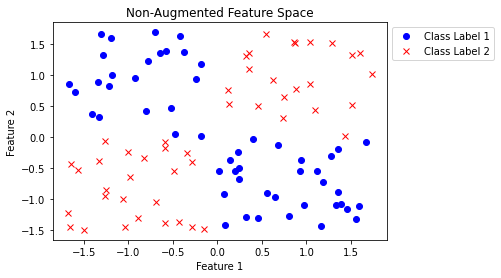

In [3]:
X1 = syn_train[syn_train[:, 2] == 1][:, :2]
X2 = syn_train[syn_train[:, 2] == 2][:, :2]

plt.plot(X1[:, 0], X1[:, 1], 'bo')
plt.plot(X2[:, 0], X2[:, 1], 'rx')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Class Label 1', 'Class Label 2'], bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Non-Augmented Feature Space')
plt.show()

### This data is not linearly separable in this feature space

## Part b)

In [4]:
X = syn_train[:, :2]
y = syn_train[:, 2]

pc1 = Perceptron(fit_intercept=False)
pc1.fit(X, y)
print(f"The final accuracy for the sklearn Perceptron is: {pc1.score(X, y)}")

The final accuracy for the sklearn Perceptron is: 0.53


## Part c)

(1442401, 2)


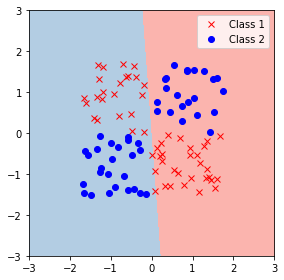

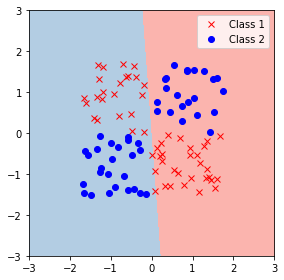

In [5]:
weights1 = pc1.coef_[0]
hf.plot_perceptron_boundary(X, y, weights1, hf.linear_decision_function)

## Part d)

In [6]:
def expand_feature_space(X):
    new_X = np.zeros((X.shape[0], 5))
    new_X[:, 0] = X[:, 0]
    new_X[:, 1] = X[:, 1]
    new_X[:, 2] = X[:, 0]*X[:, 1]
    new_X[:, 3] = X[:, 0]**2
    new_X[:, 4] = X[:, 1]**2

    return new_X

new_X = expand_feature_space(X)
pc2 = Perceptron(fit_intercept=False)
pc2.fit(new_X, y)
print(f"The final accuracy for the sklearn Perceptron is: {pc2.score(new_X, y)}")

The final accuracy for the sklearn Perceptron is: 1.0


### The data is linearly separable in the expanded feature space.

## Part e)

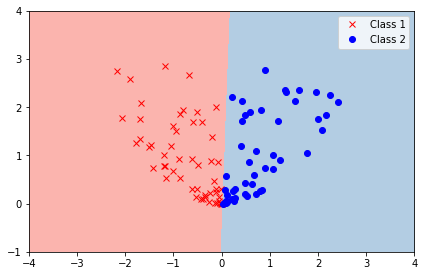

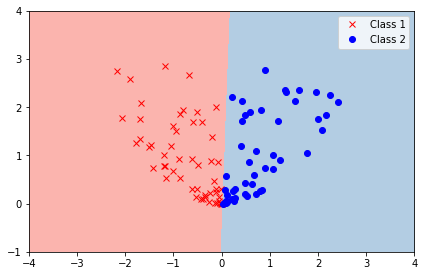

In [7]:
weights2 = pc2.coef_[0]
two_largest = np.partition(np.abs(weights2), -2)[-2:]
classes = np.sort([np.where(np.isclose(np.abs(weights2), l))[0][0] for l in two_largest])
hf.plot_perceptron_boundary(new_X[:, classes], y, weights2[classes], hf.linear_decision_function)

# Part f)

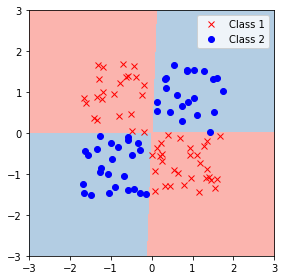

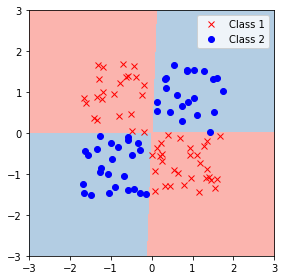

In [8]:
hf.plot_perceptron_boundary(X, y, weights2[classes], hf.nonlinear_decision_function)